In [1]:
import numpy as np
import matplotlib.pyplot as plt


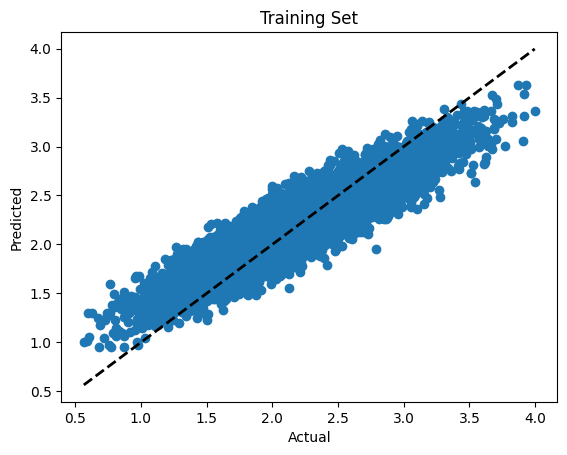

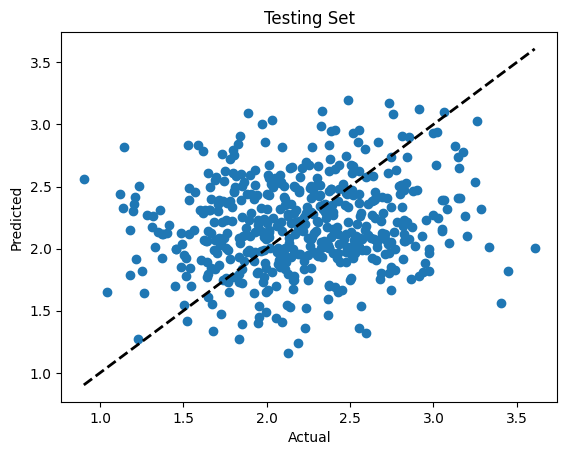

Training MSE: 0.04723947287927986
Testing MSE: 0.31101971389959465


In [9]:

def ridge_regression(X_train, y_train, X_test, y_test, alpha, lmbda, num_iters):
    # Initialize the parameters
    theta = np.zeros(X_train.shape[1])

    # Implement gradient descent algorithm for ridge regression
    for i in range(num_iters):
        # Calculate the gradient with regularization
        gradient = 2*(np.dot(X_train.T, (np.dot(X_train, theta) - y_train)) + lmbda * theta)

        # Update the parameters
        theta = theta - alpha * gradient

    # Predict using the trained model
    y_pred_train = np.dot(X_train, theta)
    y_pred_test = np.dot(X_test, theta)

    # Plot the predicted versus actual values for the training set
    plt.scatter(y_train, y_pred_train)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Training Set')
    plt.show()

    # Plot the predicted versus actual values for the testing set
    plt.scatter(y_test, y_pred_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Testing Set')
    plt.show()

    # Calculate the mean squared error
    mse_train = np.mean((y_pred_train - y_train) ** 2)
    mse_test = np.mean((y_pred_test - y_test) ** 2)

    print(f"Training MSE: {mse_train}")
    print(f"Testing MSE: {mse_test}")

    return theta

# Load the training dataset
data_train = np.loadtxt('A2Data_train.csv', delimiter=',')
X_train = data_train[:, :-1]
y_train = data_train[:, -1]

# Load the testing dataset
data_test = np.loadtxt('A2Data_test.csv', delimiter=',')
X_test = data_test[:, :-1]
y_test = data_test[:, -1]


alpha = 0.000001  # learning rate
lmbda = 0.0000001   # regularization parameter
num_iters = 1000  # number of iterations

# Apply ridge regression on the training and test data
theta = ridge_regression(X_train, y_train, X_test, y_test, alpha, lmbda, num_iters)
